In [1]:
import ast
import warnings
import textwrap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

# NLTK packages
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Spacy
import spacy

warnings.filterwarnings("ignore")

# For better visualizations
sns.set(style="ticks", palette="muted", color_codes=True)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.weight'] = 'bold'

# downloading corpus
nltk.download('stopwords')
nltk.download('punkt')

stopwords = set(stopwords.words("english"))

# Remove 'not' from stopword list
stopwords.remove('not')

# Load the spaCy English model
# https://github.com/explosion/spaCy/issues/6498
nlp = spacy.load("en_core_web_lg", disable=["parser", 'ner'])
# nlp.add_pipe('sentencizer')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def wrap_text(text):
    return textwrap.fill(text, width=85)

In [3]:
df=pd.read_csv("qatarairways_tweets_sentiments_with_keywords.csv", parse_dates=['date'])

In [4]:
df[['cleaned_text', 'yake_kw']].head(10).values

array([['fantastic service onboard impressed thank',
        'fantastic service,service onboard,onboard impressed,fantastic,service'],
       ['problem app not login account',
        'problem app,login account,problem,account,app'],
       ['report incident hope get resolution soon',
        'report incident,incident hope,report,incident,hope'],
       ['not settle due year appreciate emirates airways respect',
        'airways respect,settle due,due year,emirates airways,respect'],
       ['kindly communicate well upcoming rebooking',
        'kindly communicate,upcoming rebooking,kindly,rebooking,communicate'],
       ['not believe slowness cancel flight not inform try talk live chat happen wait minute unacceptable',
        'minute unacceptable,talk live,live chat,chat happen,happen wait'],
       ['unable log app try reset password not let proceed reset require character symbol etc check please need check flight',
        'unable log,check flight,character symbol,require character

In [5]:
df[['cleaned_text', 'keybert_kw']].head(10).values

array([['fantastic service onboard impressed thank',
        'onboard impressed,fantastic service,impressed thank,thank,service onboard'],
       ['problem app not login account',
        'not login,app not,problem app,problem,login account'],
       ['report incident hope get resolution soon',
        'resolution soon,get resolution,incident hope,report incident,incident'],
       ['not settle due year appreciate emirates airways respect',
        'airways respect,not settle,airways,due year,emirates'],
       ['kindly communicate well upcoming rebooking',
        'upcoming rebooking,rebooking,well upcoming,kindly,communicate'],
       ['not believe slowness cancel flight not inform try talk live chat happen wait minute unacceptable',
        'cancel flight,wait minute,talk live,unacceptable,flight'],
       ['unable log app try reset password not let proceed reset require character symbol etc check please need check flight',
        'reset password,password not,app try,need check,fli

In [8]:
df.loc[df['yake_kw'].str.contains("qatar", na=False)]

,link,text,date,Likes,Comments,hashtags,users,cleaned_text,sntmnt_lbl,score,keybert_kw,yake_kw


0        onboard impressed,fantastic service,impressed ...
1        not login,app not,problem app,problem,login ac...
2        resolution soon,get resolution,incident hope,r...
3        airways respect,not settle,airways,due year,em...
4        upcoming rebooking,rebooking,well upcoming,kin...
                               ...                        
63414           cancel flight,refund call,call,flight,able
63415    doha september,fly london,london abu,via doha,...
63416    allairport pune,consider pune,new route,info c...
63417    world twitter,twitter,wonderful world,welcome ...
63418    welcome twitter,amazing service,service welcom...
Name: keybert_kw, Length: 63419, dtype: object

In [75]:
df['keybert_kw'] = (
    df['keybert_kw']
    .apply(lambda x: ' '.join([word for word in x.split() if 'qatar' not in word]))
)

In [76]:
def get_kw_by_sentiment(sentiment, kw_col):

    kw = (
            df.loc[df[kw_col].ne('') & df['sntmnt_lbl'].eq(sentiment)]
            .loc[:, kw_col]
            .replace(" ", "_", regex=True)
            .replace(",", " ", regex=True)
            .str.cat(sep=" ")
    )

    return kw

In [77]:
from wordcloud import WordCloud

def create_wc(text_data, colormap=None):
    # Generate the word cloud
    wordcloud = WordCloud(width=1200, 
                          height=600,
                          colormap=colormap, 
                          background_color="black").generate(text_data)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

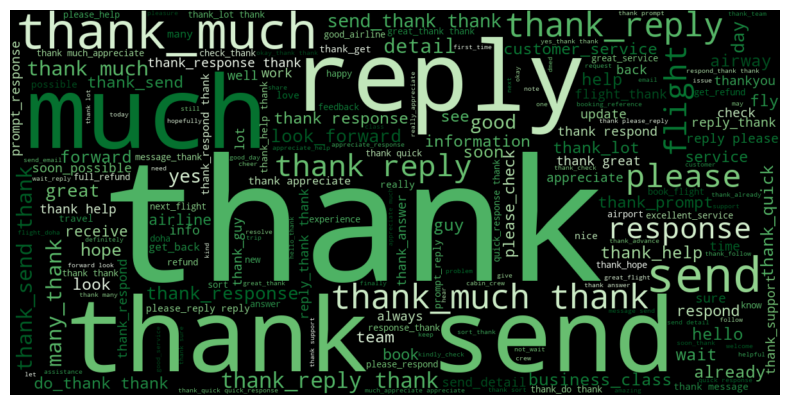

In [78]:
# Positive Keywords
text_data = get_kw_by_sentiment(sentiment='positive', kw_col='keybert_kw')
create_wc(text_data, colormap='Greens')

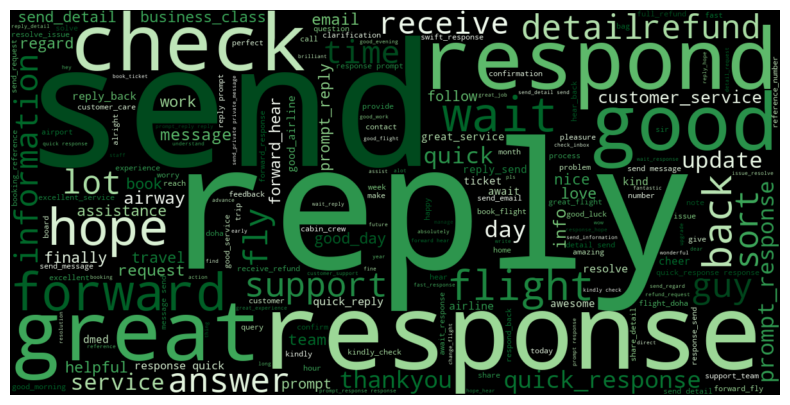

In [79]:
# Positive Keywords
text_data = get_kw_by_sentiment(sentiment='positive', kw_col='yake_kw')
create_wc(text_data, colormap='Greens')

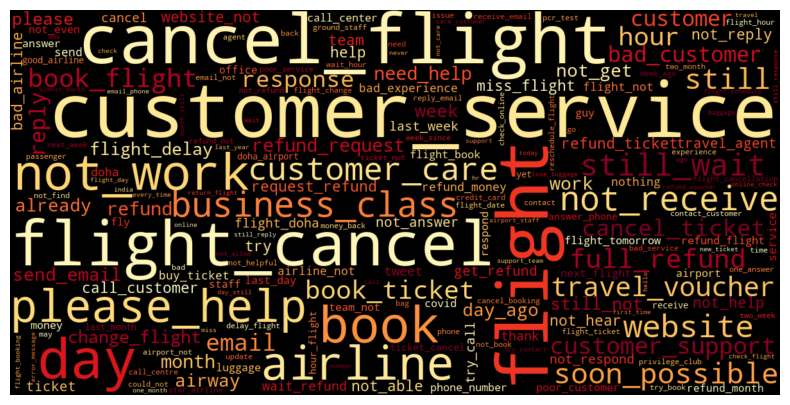

In [80]:
# Negative Keywords
text_data = get_kw_by_sentiment(sentiment='negative', kw_col='keybert_kw')
create_wc(text_data, colormap='YlOrRd')

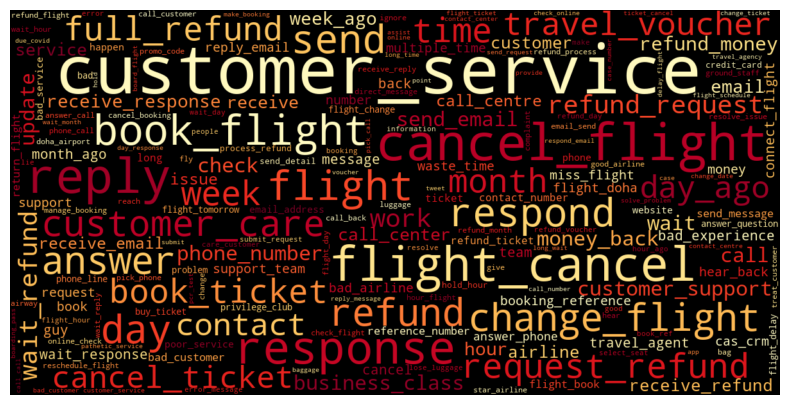

In [81]:
# Negative Keywords
text_data = get_kw_by_sentiment(sentiment='negative', kw_col='yake_kw')
create_wc(text_data, colormap='YlOrRd')

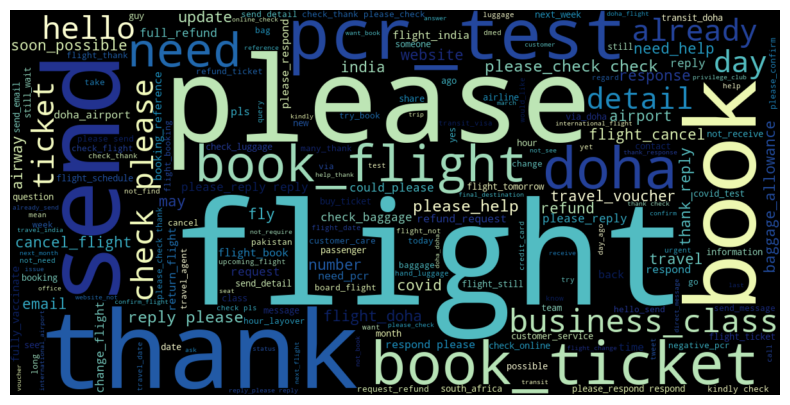

In [82]:
# Neutral Keywords
text_data = get_kw_by_sentiment(sentiment='neutral', kw_col='keybert_kw')
create_wc(text_data, colormap='YlGnBu')

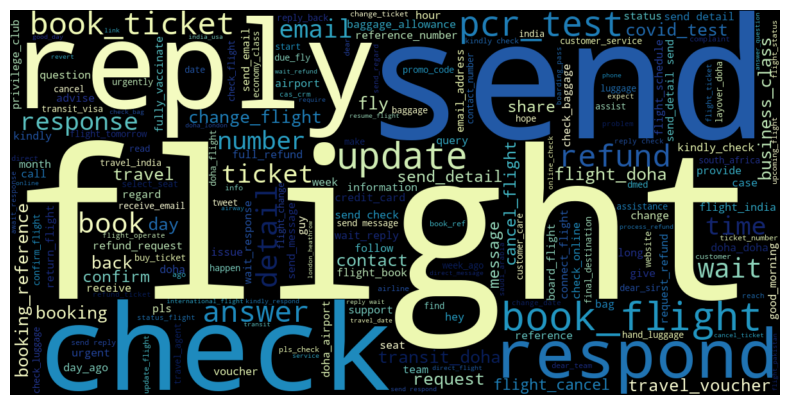

In [83]:
# Neutral Keywords
text_data = get_kw_by_sentiment(sentiment='neutral', kw_col='yake_kw')
create_wc(text_data, colormap='YlGnBu')

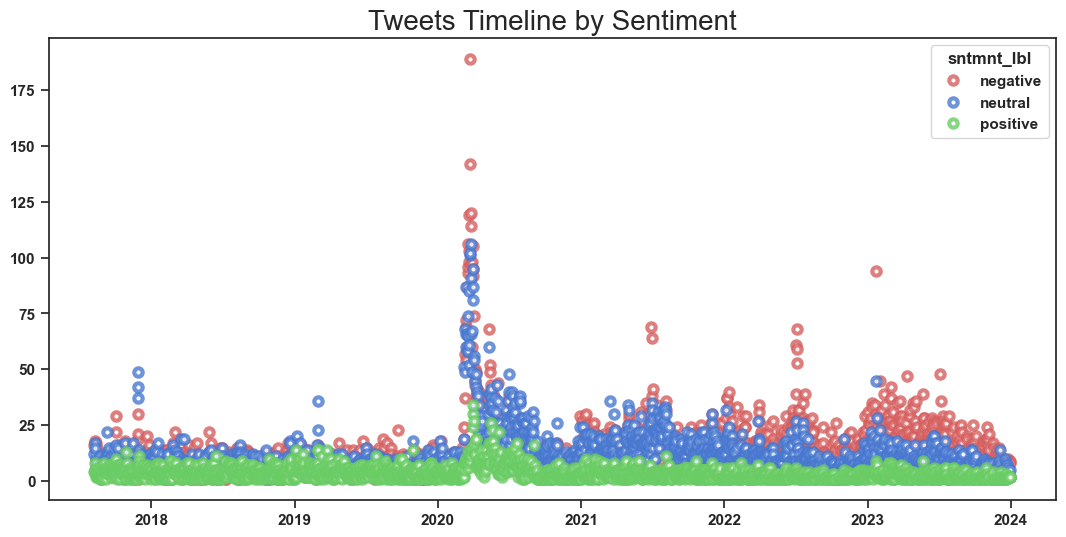

In [84]:
# Tweets Timeline
ax = (
    df.groupby([df['date'].dt.date, 'sntmnt_lbl']).size()
    .unstack('sntmnt_lbl')
    .plot(figsize=(13, 6), 
          linestyle='', 
          marker='o', 
          color=['r', 'b', 'g'], 
          alpha=0.8, 
          mfc='w', 
          markeredgewidth=3)
)

ax.set_title("Tweets Timeline by Sentiment")
ax.set_xlabel("");

In [87]:
(
    df.loc[df['keybert_kw'].ne(""), 'keybert_kw']
    .str.split(",")
    .explode()
    .value_counts()
    .nlargest(20)
    # .index
)

keybert_kw
thank               3533
please              1828
flight              1758
send                1385
reply               1326
customer service    1044
cancel flight        841
check                829
book                 800
flight cancel        756
day                  753
not                  723
please check         643
business class       624
response             620
still                583
please help          551
respond              539
book flight          519
book ticket          510
Name: count, dtype: int64

In [89]:
(
    df.loc[df['yake_kw'].ne(""), 'yake_kw']
    .str.split(",")
    .explode()
    .value_counts()
    .nlargest(20)
    # .index
)

yake_kw
send                2321
reply               2170
check               1426
customer service    1336
flight              1285
response            1112
respond             1019
wait                 729
book flight          685
refund               674
cancel flight        646
answer               587
message              575
flight cancel        569
day                  545
update               516
detail               516
time                 457
book ticket          448
pcr test             443
Name: count, dtype: int64

In [ ]:
def top_20_kw_strings(kw):
    
    # Create Top 20 keyword series
    ################################
    query=f"""
        keywords!='' and sntmnt_lbl in ('negative', 'positive')
    """

    kw_df = (
        # Filter rows with no strings and with +ve and -ve sentiments only
        df.query(query)

        # split all keywords of each row to lists
        .assign(keywords=lambda x: x['keywords'].str.split(","))

        # convert to only 1 keyword per row
        .explode(column='keywords')

        # filter out rows with the required keyword
        .query(f"keywords.str.contains('{kw}')")

        # assign a column with value 1, so that it can be summed during aggregation
        .assign(count=1)

        # group by keywords and get count of +ve and -ve sentiments
        .groupby(['keywords', 'sntmnt_lbl'])['count'].sum()

        # pivot sentiment column
        .unstack('sntmnt_lbl')

        # Some keywords may have only -ve category (or vice versa). 
        # If so, create a new column for the missing sentiment with value 0
        .assign(negative=lambda x: x['negative'] if 'negative' in x.columns else 0,
                positive=lambda x: x['positive'] if 'positive' in x.columns else 0)

        # convert to integer data type and create new column that has total of -ve and +ve
        .assign(negative=lambda x: x['negative'].astype("Int64"),
                positive=lambda x: x['positive'].astype("Int64"),
                total=lambda x: x['negative'] + x['positive'])

        # select only the top 20 by total
        .nlargest(20, columns='total')

        # drop total column
        .drop('total', axis=1)

        # Ensure the columns are of this order
        .reindex(columns=['negative', 'positive'])
    )

    return kw_df

In [ ]:
def kw_sntmnt_timeline(kw):
    
    # Create keyword frequncy timeline
    ##################################
    
    start=df['date'].dt.date.min()
    end=df['date'].dt.date.max()

    tl_df = (   
        # query rows with required keyword and filter out rows with neutral sentiment
        df.query(f"keywords.str.contains('{kw}') and sntmnt_lbl!='neutral'")

        # create new column containing date value
        # This is useful during aggregating by date and getting count of keyword per day
        .assign(only_date=lambda x: pd.to_datetime(x['date'].dt.date))

        # group by date and sentiment label and get count
        .groupby(['only_date', 'sntmnt_lbl']).size()

        # pivot sentiment col
        .unstack('sntmnt_lbl')
        
        # Some keywords may have only -ve category (or vice versa). 
        # If so, create a new column for the missing sentiment with value null
        .assign(negative=lambda x: x['negative'] if 'negative' in x.columns else np.nan,
                positive=lambda x: x['positive'] if 'positive' in x.columns else np.nan)

        # Ensure date range is from aug 2017 to dec 2023 and ensure right order of columns
        .reindex(pd.date_range(start, end), columns=['negative', 'positive'])

        # convert to integer data type and create new column
        .assign(negative=lambda x: x['negative'].astype("Int64"),
                positive=lambda x: x['positive'].astype("Int64"))
    )

    return tl_df

In [ ]:
def get_ht_sntmnt_from_kw(kw):
    
    # dataframe with concatenated hastags by sentiments
    ht_df = (
        df.query(f"keywords.str.contains('{kw}') and hashtags!='[]' and sntmnt_lbl!='neutral'")
        .loc[:, ['sntmnt_lbl', 'hashtags']]
        .assign(hashtags=lambda x: x['hashtags'].apply(ast.literal_eval))
        .explode(column='hashtags')
        .assign(hashtags=lambda x: x['hashtags'].str.lower())
        .loc[lambda x: ~x['hashtags'].isin(['#qatarairways', '#qatar', '#qrsupport'])]
        .loc[lambda x: ~x['hashtags'].str.contains(r'^#[0-9]+$')]
        .groupby('sntmnt_lbl')['hashtags'].agg(lambda x: ' '.join(x))
    )

    # Negative hashtag
    try:
        neg_ht = ht_df.loc[lambda x: x.index=='negative'].values[0]
    except IndexError:
        neg_ht = 'no_hashtag'

    # Positive hashtag
    try:
        pos_ht = ht_df.loc[lambda x: x.index=='positive'].values[0]
    except IndexError:
        pos_ht = 'no_hashtag'

    return neg_ht, pos_ht

In [ ]:
def analyze_kw(kw):

    # https://www.geeksforgeeks.org/how-to-create-different-subplot-sizes-in-matplotlib/

    fig = plt.figure()
    fig.set_figheight(7.8)
    fig.set_figwidth(12)

    ax0 = plt.subplot2grid(shape=(2, 4), loc=(0, 0))
    ax1 = plt.subplot2grid(shape=(2, 4), loc=(0, 1), colspan=3)
    ax2 = plt.subplot2grid(shape=(2, 4), loc=(1, 0), colspan=2)
    ax3 = plt.subplot2grid(shape=(2, 4), loc=(1, 2), colspan=2)

    # Colors for sentiment
    color=['r', 'green']

    # Create Top 20 keyword Bargraph
    ################################

    subplot_title="" if len(kw)>25 else kw

    top_20_kw_strings_df = top_20_kw_strings(kw=kw)

    # Plot bargraph
    top_20_kw_strings_df.plot(kind='barh', 
                                stacked=True, 
                                edgecolor='k', 
                                ax=ax0, 
                                color=color, 
                                legend=None)

    ax0.set_title(f"kw: '{subplot_title}'")

    # Create keyword frequncy timeline
    ##################################

    kw_sntmnt_timeline_df = kw_sntmnt_timeline(kw=kw)

    kw_sntmnt_timeline_df.plot(ax=ax1, 
                            linestyle="", 
                            marker='.', 
                            alpha=0.7, 
                            color=color, 
                            legend=None)

    ax1.set_title(f"Keyword '{subplot_title}' timeline")
    ax1.set_xlabel("")
    
    max_ylim=kw_sntmnt_timeline(kw).max().max()

    if  max_ylim < 10: 
        ax1.set_ylim(0, 10)
        ax1.set_yticks(range(0, 12, 2))

    # Highlighting Qatar flight ban time period
    # ax1.fill_between(x=("2020-03-18", "2020-04-01"), y1=0, y2=max_ylim+2, color='b', alpha = 0.5)

    # Hashtag Worldclouds by sentiment
    ##################################
    
    neg_ht, pos_ht = get_ht_sntmnt_from_kw(kw)

    for ht, ax, cmap, title in zip([neg_ht, pos_ht],
                             [ax2, ax3],
                             ['YlOrRd', 'Greens'],
                             ["#negativehastags", "#positivehashtags"]):

        wordcloud = WordCloud(width=600, height=350, colormap=cmap).generate(ht)
        
        ax.set_title(title)
        ax.imshow(wordcloud, interpolation="bilinear")
        ax.axis("off")
        ax.grid(None)
        

    labels=['negative', 'positive']
    fig.legend(labels, loc='center', bbox_to_anchor=(0.88, 0.92), ncol=len(labels), 
               bbox_transform=fig.transFigure)

    plt.tight_layout()
    plt.show()

In [ ]:
analyze_kw(kw='customer')

In [ ]:
analyze_kw(kw='refund')

In [ ]:
analyze_kw(kw='covid')

In [ ]:
analyze_kw(kw='send')

In [ ]:
analyze_kw(kw='service')

In [ ]:
# Missclassification by roBERTa. This wassupposed to be of negative sentiment.

(
    df.query("hashtags.str.contains('disappoint', case=False) and sntmnt_lbl=='positive'")
    .loc[:, ['text', 'cleaned_text', 'sntmnt_lbl', 'keywords']]
    .values
)
analyze_kw(kw='reply')
analyze_kw(kw='delay')
analyze_kw(kw='response|respond')
analyze_kw(kw='reference')
analyze_kw(kw='compensation')
analyze_kw(kw='luggage|bag[gage]*')
# Users
# Analyzing those tweets by a users that tweeted the most in a single day

In [ ]:
def analyze_usertweets_by_date(user, date):

    end_of_date=(pd.Timedelta('1D') + pd.to_datetime(date)).strftime('%Y-%m-%d')

    text_data=(
        df.loc[df['date'].between(date, end_of_date) & df['users'].eq(user)]
        .sort_values('date')
        .loc[:, 'keywords']
        .str.split(",")
        .explode()
        .replace(" ", "_", regex=True)
        .str.cat(sep=" ")
    )

    create_wc(text_data)

In [ ]:
# Getting list of users that tweeted the most in a single day with their 
# tweet count for that day
(
    df.assign(only_date=lambda x: x['date'].dt.date)
    .groupby(['only_date', 'users']).size()
    .to_frame('tweet_count')
    .reset_index()
    .assign(tweet_count_rank=lambda x: (x.groupby('only_date')['tweet_count']
                                        .rank('dense', ascending=False)
                                        .astype(int)))
    .loc[lambda x: x['tweet_count_rank'].eq(1)]
    .drop('tweet_count_rank', axis=1)
    .nlargest(10, columns='tweet_count')    
)

In [ ]:
user='KiranKu78839646'
date='2017-10-02'

analyze_usertweets_by_date(user, date)

In [ ]:
user='TanyaT55736757'
date='2023-03-16'

analyze_usertweets_by_date(user, date)

In [ ]:
user='stevesukkie93'
date='2020-11-01'

analyze_usertweets_by_date(user, date)